In [3]:
import numpy as np
import sklearn

from IPython import get_ipython
import import_ipynb
get_ipython().run_line_magic('run','03_LASSO_Regression.ipynb')
# but the above lines not only load or import the module but also run the code


Data shape: (150, 4)

Labels shape: (150,)

Coefficients: array([ 0.        , -0.        ,  0.40811896,  0.        ])

Intercept: -0.5337110569441172

R2: 0.895821120274704



# A. Making decisions
Each model we've looked at so far is based on creating an optimal linear combination of dataset features for either regression or classification. However, another popular model in data science for both classification and regression is the decision tree. It is a binary tree where each node of the tree decides on a particular feature of the dataset, and we descend to the node's left or right child depending on the feature's value.

If a feature is boolean, we go left or right from the node depending on if the feature value is true or false. If a feature is numeric, we can decide to go left or right based on a decision boundary for the feature (e.g. go left if the feature value is less than 1, otherwise go right).

The leaves of the decision tree determine the class label to predict (in classification) or the real number value to predict (in regression).

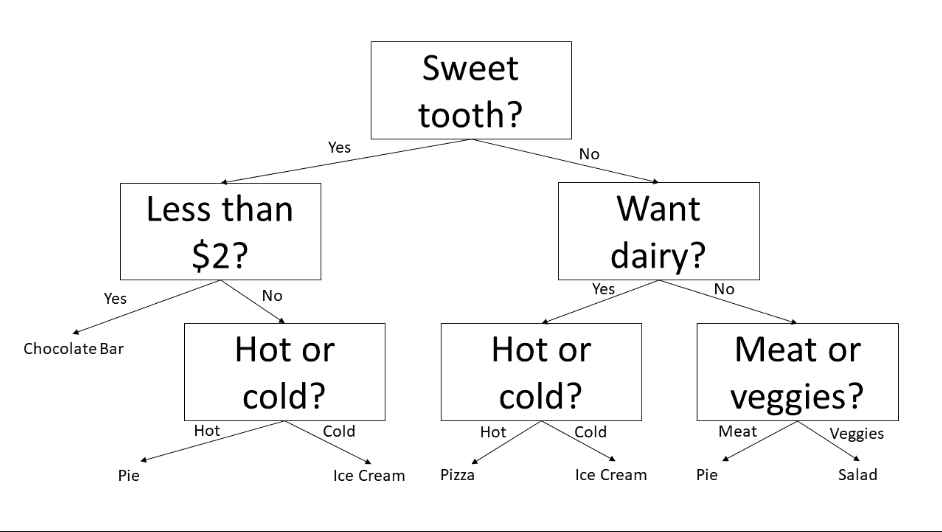

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; A decision tree for deciding what to eat. This is an example of multiclass classification.

In scikit-learn, we implement classification decision trees with the DecisionTreeClassifier object, and regression trees with the DecisionTreeRegressor object. Both objects are part of the tree module in scikit-learn.

The code below demonstrates how to create decision trees for classification and regression. Each decision tree uses the fit function for fitting on data and labels.

In [4]:
from sklearn import tree
clf_tree1 = tree.DecisionTreeClassifier()
reg_tree1 = tree.DecisionTreeRegressor()
clf_tree2 = tree.DecisionTreeClassifier(
  max_depth=8)  # max depth of 8
reg_tree2 = tree.DecisionTreeRegressor(
  max_depth=5)  # max depth of 5
# the original data is of shape (569,4)
# and it's lable is of shape (569,)

# but here we have take a data from file 03_LASSO in which the shape of data is (150,4)
# and shape of it's label is (150,)

# predefined dataset
print('Data shape: {}\n'.format(data.shape))
# Binary labels
print('Labels:\n{}\n'.format(repr(labels)))
clf_tree1.fit(data, labels)

Data shape: (150, 4)

Labels:
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])



DecisionTreeClassifier()

The max_depth keyword argument lets us manually set the maximum number of layers allowed in the decision tree (i.e. the tree's maximum depth). The default value is None, meaning that the decision tree will continue to be constructed until no nodes can have anymore children. Since large decision trees are prone to overfit data, it can be beneficial to manually set a maximum depth for the tree.

# B. Choosing features
Since a decision tree makes decisions based on feature values, the question now becomes how we choose the features to decide on at each node. In general terms, we want to choose the feature value that "best" splits the remaining dataset at each node.

How we define "best" depends on the decision tree algorithm that's used. Since scikit-learn uses the CART algorithm, we use Gini Impurity, MSE (mean squared error), and MAE (mean absolute error) to decide on the best feature at each node.

Specifically, for classification trees we choose the feature at each node that minimizes the remaining dataset observations' Gini Impurity. For regression trees we choose the feature at each node that minimizes the remaining dataset observations' MSE or MAE, depending on which you choose to use (the default for DecisionTreeRegressor is MSE).